Clustering: Hierarchical
Dataset : 50_Startups.csv
Apply Data pre-processing (Label Encoding , Data Transformation....)
techniques if necessary.
Apply Hierarchical clustering algorithms (based on PROFIT column)
to find the group of start-ups.

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [22]:
df = pd.read_csv('/content/50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [24]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

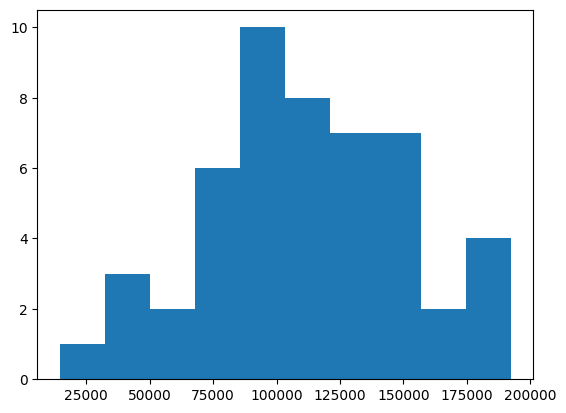

In [25]:
plt.hist(df['PROFIT'])
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(df[['PROFIT']])

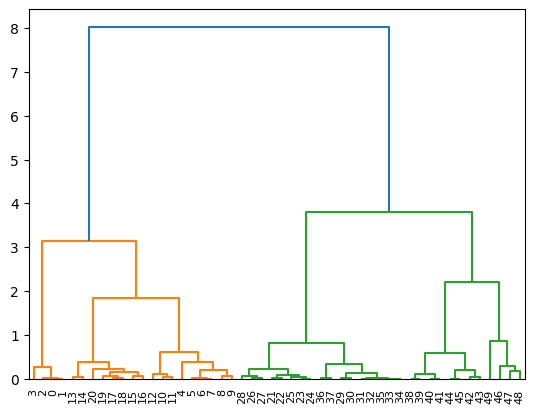

In [27]:
dendro = dendrogram(linkage(x, method="ward"))
plt.show()

In [30]:
hc = AgglomerativeClustering(n_clusters=3, linkage="ward", affinity="euclidean")
y_pred = hc.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [31]:
df['label'] = y_pred

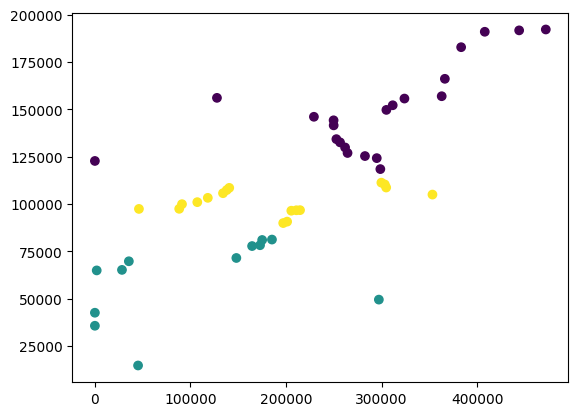

In [32]:
plt.scatter(df['MKT'], df['PROFIT'], c=df['label'])
plt.show()